In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from itertools import combinations

# Carichiamo i dati d'interesse

In [2]:
num_cluster = 2

x_bound = int(155/5)

y_bound = int(155/5)

with open('./pickles/rese_total.pickle', 'rb') as handle:
    rese_total = pickle.load(handle)

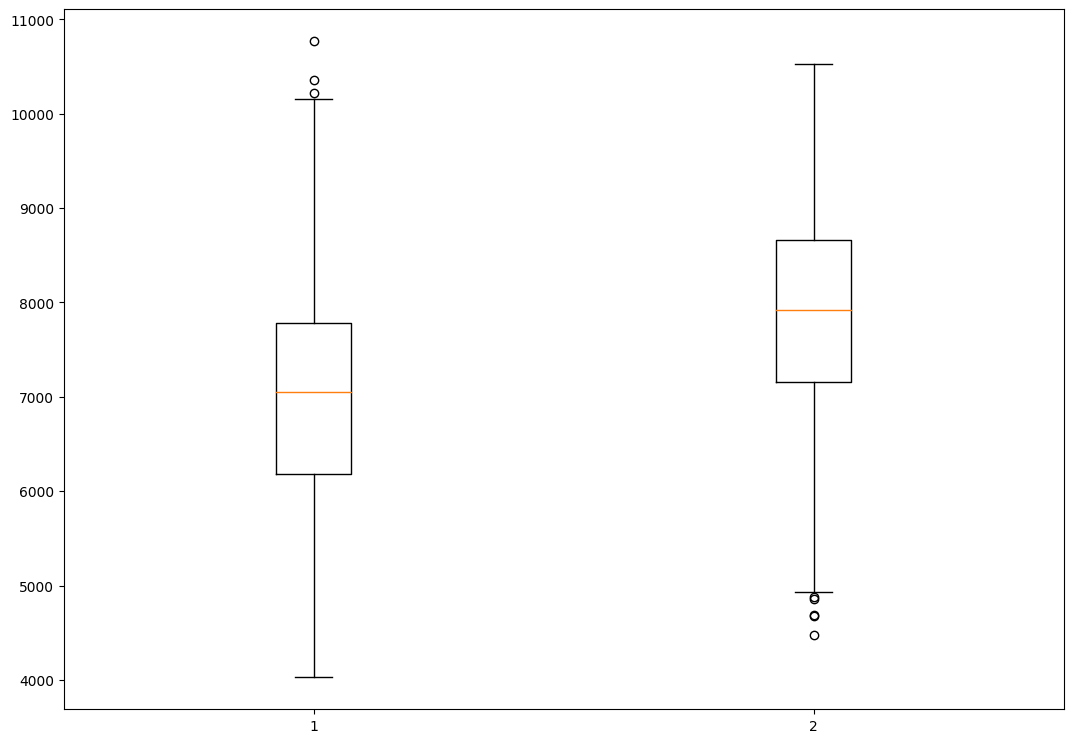

In [3]:
fig = plt.figure(figsize =(10, 7))

stampa = []
xplot = 13
yplot = 0
for a in range(0,num_cluster):
    stampa.append(rese_total[xplot,yplot,a])

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(stampa)

# show plot
plt.show()

# Usiamo i dataframe per andare a calcolare i max e min dei vari boxplot

In [4]:
min_max = np.zeros([x_bound,y_bound,num_cluster,2], dtype=float)

for a in range(x_bound):
    for b in range(y_bound):
        if(rese_total[a,b,0] is not None):
            for c in range(num_cluster):
                min_max[a,b,c,:] = [np.quantile(rese_total[a,b,c],q=0.25),np.quantile(rese_total[a,b,c],q=0.75)]


In [5]:
print(min_max)

[[[[6587.39990234 8099.79980469]
   [7142.62487793 8703.20019531]]

  [[6747.60009766 8308.5       ]
   [7007.60009766 8638.05029297]]

  [[7666.62512207 8936.22509766]
   [6530.19995117 7851.95019531]]

  ...

  [[7411.75       8796.64990234]
   [6255.84985352 7657.72485352]]

  [[6257.79980469 7657.29980469]
   [7414.75012207 8796.97485352]]

  [[   0.            0.        ]
   [   0.            0.        ]]]


 [[[7366.72485352 8760.5       ]
   [6701.60009766 8141.79980469]]

  [[7661.89990234 8935.5       ]
   [6533.72509766 7869.57495117]]

  [[7690.5        8946.        ]
   [6523.65002441 7827.82495117]]

  ...

  [[6257.79980469 7657.29980469]
   [7414.75012207 8796.97485352]]

  [[   0.            0.        ]
   [   0.            0.        ]]

  [[   0.            0.        ]
   [   0.            0.        ]]]


 [[[7693.75       8940.30029297]
   [6525.74987793 7834.44995117]]

  [[7676.57519531 8945.05004883]
   [6522.60009766 7827.29980469]]

  [[7626.57495117 8929.1496582

# Andiamo a fare il calcolo delle permutazioni, andando a confrontare i min e i max

In [6]:
perm = list(combinations(range(num_cluster), 2))
'''print(list(perm))
print(perm[0][1])'''
difference_min_max = np.zeros([x_bound,y_bound,2])

for a in range(x_bound):
    for b in range(y_bound):
        difference_array = []
        for c in perm:
            difference_array.append(abs(min_max[a,b,c[0],0]-min_max[a,b,c[1],0]))
        difference_min_max[a,b,0] = min(difference_array)
        difference_min_max[a,b,1] = max(difference_array)
            

# Plot delle differenze

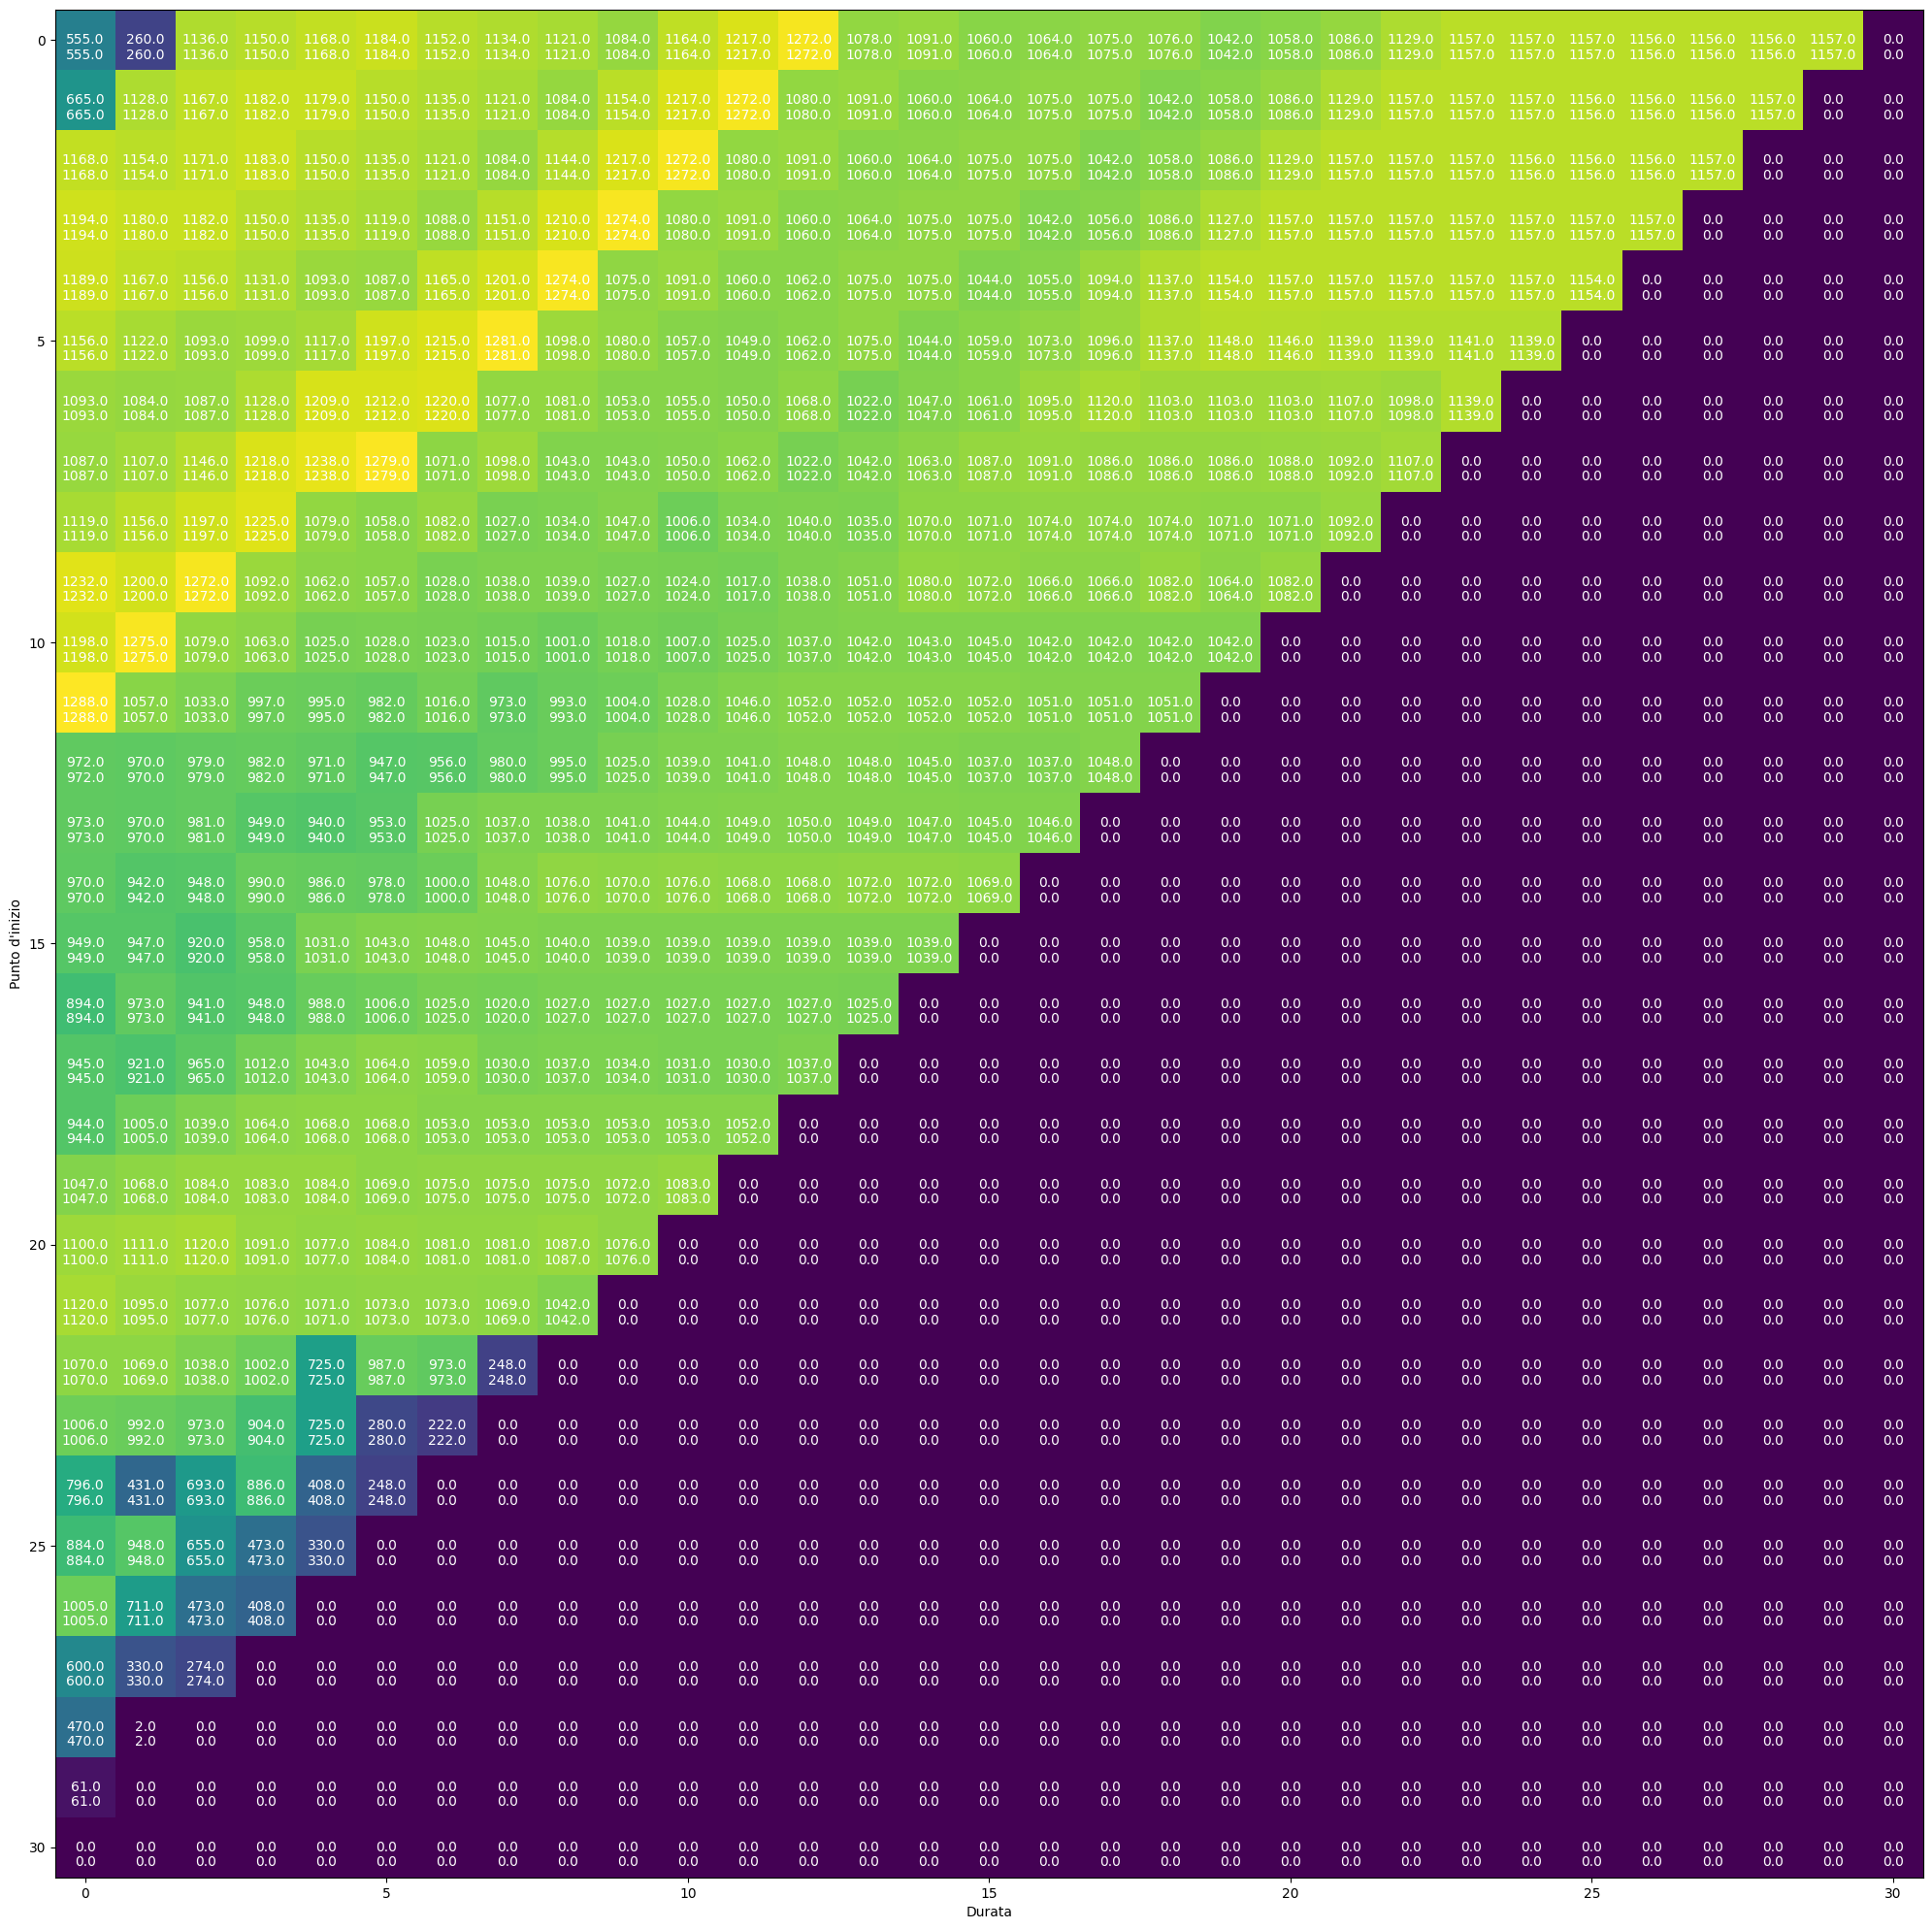

In [7]:
# Andiamo a stampare le deviazioni standard di tutti i cluster 

fig, ax = plt.subplots()
image = ax.imshow(difference_min_max[:,:,0])
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
fig.set_size_inches(25,25)
for i in range(0,difference_min_max.shape[0]):
    for j in range(0,difference_min_max.shape[1]):
        c = np.round(difference_min_max[i,j,0],decimals=0)
        c1 = np.round(difference_min_max[i,j,1])
        ax.text(j, i, str(c), va='center', ha='center',color= 'white')
        ax.text(j,(i+0.25),str(c1),va='center', ha='center',color= 'white')